In [40]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [41]:
df = pd.read_excel("Andrews_Neural_Network.xls")

In [44]:
df = df.set_index('Year')
df.index

DatetimeIndex(['1993-01-01', '1994-01-01', '1995-01-01', '1996-01-01',
               '1997-01-01', '1998-01-01', '1999-01-01', '2000-01-01',
               '2001-01-01', '2002-01-01', '2003-01-01', '2004-01-01',
               '2005-01-01', '2006-01-01', '2007-01-01', '2008-01-01',
               '2009-01-01', '2010-01-01', '2011-01-01', '2012-01-01',
               '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01',
               '2017-01-01', '2018-01-01', '2019-01-01'],
              dtype='datetime64[ns]', name='Year', freq=None)

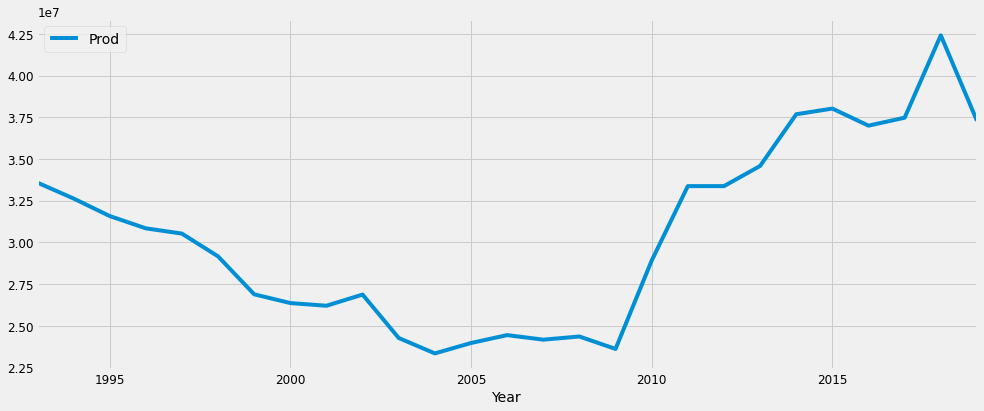

In [45]:
df.plot(figsize=(15, 6))
plt.show()

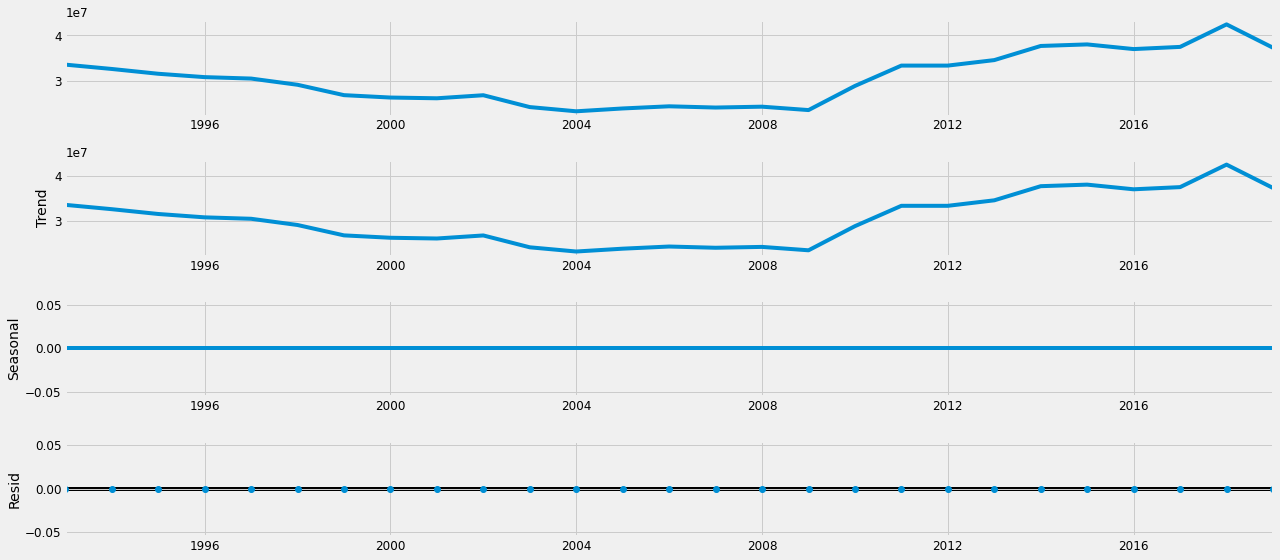

In [46]:
#time-series decomposition
#decompose our time series into three distinct components
#trend, seasonality, and noise

from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df, model='additive')
fig = decomposition.plot()
plt.show()

In [47]:
# ARIMA, which stands for Autoregressive Integrated Moving Average.
# ARIMA models are denoted with the notation ARIMA(p, d, q)

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [48]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        
        except:
            continue

In [49]:
mod = sm.tsa.statespace.SARIMAX(df,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8475      0.543      1.560      0.119      -0.217       1.912
ma.L1         -0.9854      1.464     -0.673      0.501      -3.855       1.884
ar.S.L12      -0.0101      1.344     -0.007      0.994      -2.644       2.624
sigma2      1.372e+13   1.21e-13   1.13e+26      0.000    1.37e+13    1.37e+13


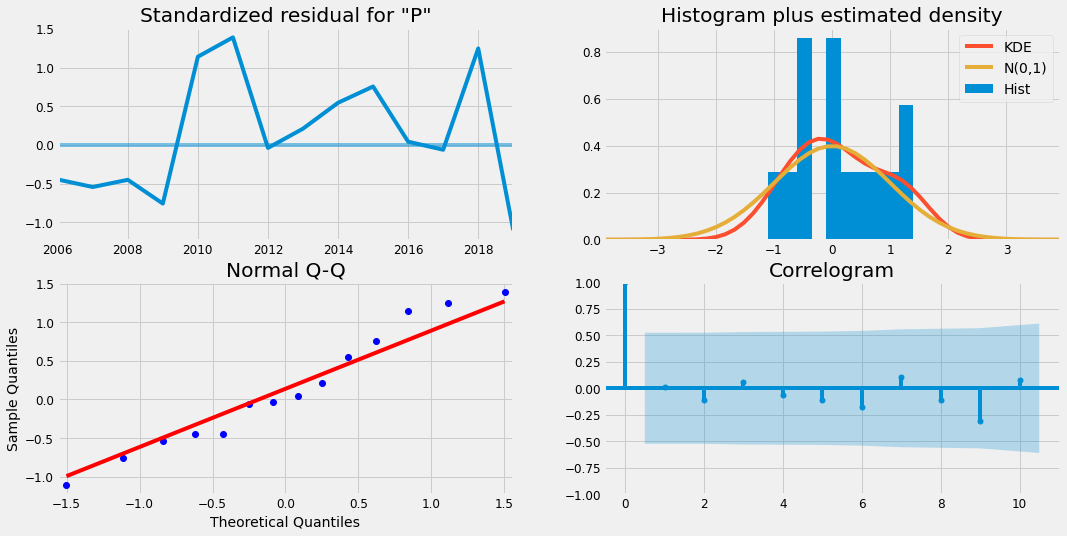

In [55]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

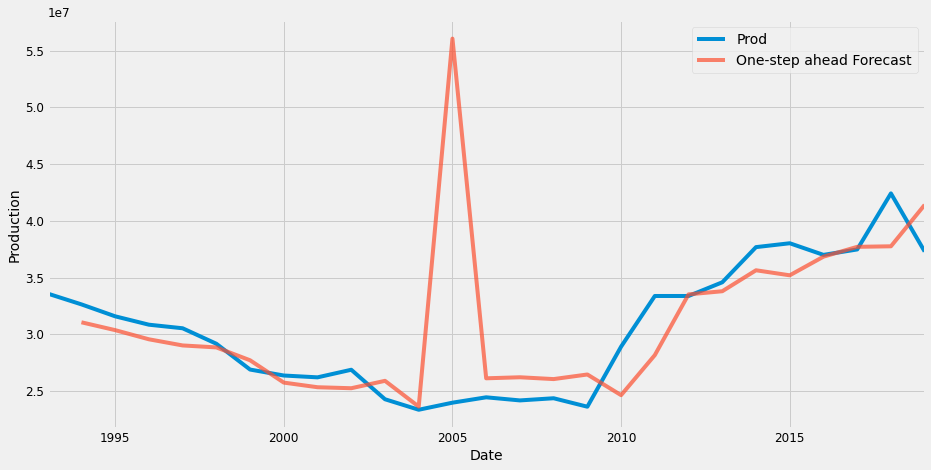

In [62]:
pred = results.get_prediction(start=pd.to_datetime('1994-01-01'), dynamic=False)
pred_ci = pred.conf_int()
pred_ci.iloc[:, 1]
ax = df.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
#ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Production')
plt.legend()
plt.show()

In [63]:
y_forecasted = pred.predicted_mean
y_truth = df
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1994-01-01 00:00:00   NaN
1995-01-01 00:00:00   NaN
1996-01-01 00:00:00   NaN
1997-01-01 00:00:00   NaN
1998-01-01 00:00:00   NaN
1999-01-01 00:00:00   NaN
2000-01-01 00:00:00   NaN
2001-01-01 00:00:00   NaN
2002-01-01 00:00:00   NaN
2003-01-01 00:00:00   NaN
2004-01-01 00:00:00   NaN
2005-01-01 00:00:00   NaN
2006-01-01 00:00:00   NaN
2007-01-01 00:00:00   NaN
2008-01-01 00:00:00   NaN
2009-01-01 00:00:00   NaN
2010-01-01 00:00:00   NaN
2011-01-01 00:00:00   NaN
2012-01-01 00:00:00   NaN
2013-01-01 00:00:00   NaN
2014-01-01 00:00:00   NaN
2015-01-01 00:00:00   NaN
2016-01-01 00:00:00   NaN
2017-01-01 00:00:00   NaN
2018-01-01 00:00:00   NaN
2019-01-01 00:00:00   NaN
Prod                  NaN
dtype: float64


In [64]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 1994-01-01 00:00:00   NaN
1995-01-01 00:00:00   NaN
1996-01-01 00:00:00   NaN
1997-01-01 00:00:00   NaN
1998-01-01 00:00:00   NaN
1999-01-01 00:00:00   NaN
2000-01-01 00:00:00   NaN
2001-01-01 00:00:00   NaN
2002-01-01 00:00:00   NaN
2003-01-01 00:00:00   NaN
2004-01-01 00:00:00   NaN
2005-01-01 00:00:00   NaN
2006-01-01 00:00:00   NaN
2007-01-01 00:00:00   NaN
2008-01-01 00:00:00   NaN
2009-01-01 00:00:00   NaN
2010-01-01 00:00:00   NaN
2011-01-01 00:00:00   NaN
2012-01-01 00:00:00   NaN
2013-01-01 00:00:00   NaN
2014-01-01 00:00:00   NaN
2015-01-01 00:00:00   NaN
2016-01-01 00:00:00   NaN
2017-01-01 00:00:00   NaN
2018-01-01 00:00:00   NaN
2019-01-01 00:00:00   NaN
Prod                  NaN
dtype: float64


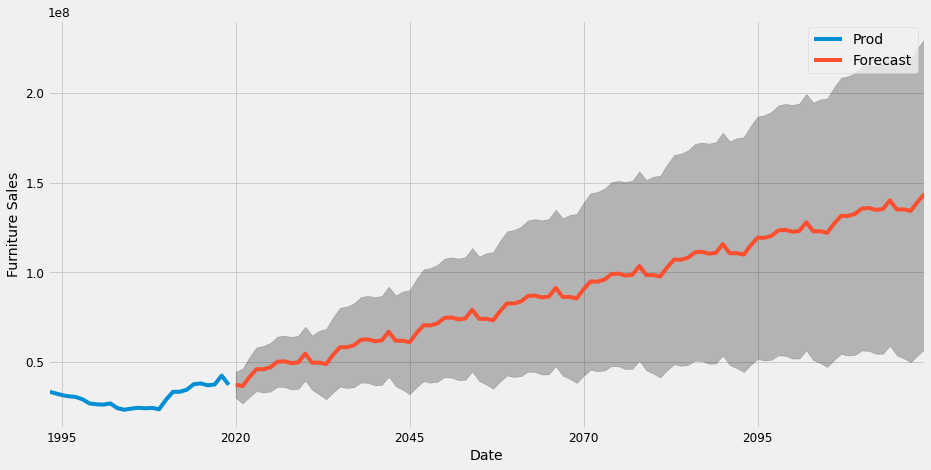

In [66]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = df.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()
